# Multiple linear regression - model implemenation

In this notebook, we are training custom implementation of regression model. As a result, we will compare the model performace (R-squared score) with sklearn model, which will be a benchmark for our test.

### Importing dataset

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing cleaned dataset with apartments for sale in Belgrade
dataset = pd.read_csv('../../database/backup/belgrade_flats.csv')
dataset.head()

,price,location_city,location_city_district,area_property,num_floors_building,apartment_floor,registered,heating_type,num_rooms,num_bathrooms
0,109000.0,beograd,stari grad,71.0,9.0,7.0,False,Centralno,2.0,1.0
1,149500.0,beograd,stari grad,74.0,4.0,2.0,True,Centralno,3.0,1.0
2,108000.0,beograd,zvezdara,60.0,4.0,3.0,False,Etažno,2.5,1.0
3,145000.0,beograd,vracar,96.0,2.0,1.0,True,Etažno,4.5,1.0
4,180000.0,beograd,palilula,94.0,5.0,4.0,True,Centralno,4.0,1.0


### Preparing data for modeling

In [3]:
# Reving columns that aren't going to be used in regression model
dataset = dataset.drop(columns=['location_city', 'num_floors_building', 'num_bathrooms', 'apartment_floor'])
dataset

,price,location_city_district,area_property,registered,heating_type,num_rooms
0,109000.0,stari grad,71.0,False,Centralno,2.0
1,149500.0,stari grad,74.0,True,Centralno,3.0
2,108000.0,zvezdara,60.0,False,Etažno,2.5
3,145000.0,vracar,96.0,True,Etažno,4.5
4,180000.0,palilula,94.0,True,Centralno,4.0
...,...,...,...,...,...,...
3738,43200.0,grocka,48.0,True,Struja,3.0
3739,101000.0,novi beograd,55.0,True,Centralno,2.5
3740,37700.0,zemun,29.0,False,Etažno,1.0
3741,57000.0,rakovica,55.0,True,Centralno,2.0


In [4]:
# Splitting dataset into features (input values) and output value 
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [5]:
# Encocding catgorical variables:
# 1. City district/municipality
# 2. Heating type

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [0, 3])], remainder='passthrough')
X = np.array(ct1.fit_transform(X))

In [6]:
# Splitting dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
# One observation from training set, after one-hot-encoding categorical variables
X_train[0]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 60.0, True,
       2.0], dtype=object)

In [8]:
# Standardizing numerical columns
# (regression model will be trained faster with standardized data points)

from sklearn.preprocessing import StandardScaler
ct2 = ColumnTransformer([('standard_scaler', StandardScaler(), [-1, -3])], remainder='passthrough')
X_train = ct2.fit_transform(X_train)
X_test = ct2.transform(X_test)

In [9]:
# One observation from training set, after standardizing numberical columns
X_train[0]

array([-0.6227066141120254, -0.36314601634061805, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, True], dtype=object)

### Training Multiple Linear Regression Model


In [10]:
# Importing custom implementation of linear regressor
from linear_regression_model import LinerRegression

In [11]:
# Fitting our model
regressor = LinerRegression(alpha=0.01, num_iter=1000)
regressor.fit(X_train, y_train)

Iteration 0, error: 35290659240.35838
Iteration 1, error: 34160254238.47063
Iteration 2, error: 33079407337.519413
Iteration 3, error: 32045910806.76381
Iteration 4, error: 31057656009.208424
Iteration 5, error: 30112628928.011242
Iteration 6, error: 29208905895.798805
Iteration 7, error: 28344649517.65087
Iteration 8, error: 27518104778.938324
Iteration 9, error: 26727595329.60078
Iteration 10, error: 25971519936.83439
Iteration 11, error: 25248349098.52686
Iteration 12, error: 24556621810.12667
Iteration 13, error: 23894942477.966923
Iteration 14, error: 23261977972.38313
Iteration 15, error: 22656454814.26775
Iteration 16, error: 22077156488.994793
Iteration 17, error: 21522920881.92401
Iteration 18, error: 20992637829.958843
Iteration 19, error: 20485246783.883858
Iteration 20, error: 19999734576.44822
Iteration 21, error: 19535133291.39105
Iteration 22, error: 19090518228.823605
Iteration 23, error: 18665005962.59226
Iteration 24, error: 18257752485.44555
Iteration 25, error: 1786

Iteration 207, error: 8178591345.999559
Iteration 208, error: 8173235089.731981
Iteration 209, error: 8167901243.451119
Iteration 210, error: 8162589499.823848
Iteration 211, error: 8157299561.863869
Iteration 212, error: 8152031142.5153475
Iteration 213, error: 8146783964.253853
Iteration 214, error: 8141557758.703867
Iteration 215, error: 8136352266.2721615
Iteration 216, error: 8131167235.79639
Iteration 217, error: 8126002424.2082405
Iteration 218, error: 8120857596.210533
Iteration 219, error: 8115732523.967682
Iteration 220, error: 8110626986.808954
Iteration 221, error: 8105540770.94399
Iteration 222, error: 8100473669.190076
Iteration 223, error: 8095425480.710653
Iteration 224, error: 8090396010.764626
Iteration 225, error: 8085385070.465979
Iteration 226, error: 8080392476.553302
Iteration 227, error: 8075418051.168783
Iteration 228, error: 8070461621.646296
Iteration 229, error: 8065523020.308184
Iteration 230, error: 8060602084.270374
Iteration 231, error: 8055698655.255504

Iteration 413, error: 7376569931.093896
Iteration 414, error: 7373754338.929528
Iteration 415, error: 7370946737.417791
Iteration 416, error: 7368147100.197819
Iteration 417, error: 7365355401.006511
Iteration 418, error: 7362571613.67807
Iteration 419, error: 7359795712.143529
Iteration 420, error: 7357027670.43029
Iteration 421, error: 7354267462.661662
Iteration 422, error: 7351515063.056415
Iteration 423, error: 7348770445.928332
Iteration 424, error: 7346033585.68576
Iteration 425, error: 7343304456.831178
Iteration 426, error: 7340583033.960763
Iteration 427, error: 7337869291.76396
Iteration 428, error: 7335163205.023057
Iteration 429, error: 7332464748.612767
Iteration 430, error: 7329773897.499813
Iteration 431, error: 7327090626.742509
Iteration 432, error: 7324414911.490358
Iteration 433, error: 7321746726.983647
Iteration 434, error: 7319086048.553043
Iteration 435, error: 7316432851.619202
Iteration 436, error: 7313787111.692369
Iteration 437, error: 7311148804.371988
Iter

Iteration 619, error: 6933478199.235236
Iteration 620, error: 6931866792.182512
Iteration 621, error: 6930259530.758092
Iteration 622, error: 6928656402.259924
Iteration 623, error: 6927057394.029609
Iteration 624, error: 6925462493.452245
Iteration 625, error: 6923871687.956256
Iteration 626, error: 6922284965.013247
Iteration 627, error: 6920702312.137831
Iteration 628, error: 6919123716.887473
Iteration 629, error: 6917549166.862343
Iteration 630, error: 6915978649.705146
Iteration 631, error: 6914412153.100973
Iteration 632, error: 6912849664.777138
Iteration 633, error: 6911291172.503032
Iteration 634, error: 6909736664.089954
Iteration 635, error: 6908186127.390979
Iteration 636, error: 6906639550.300777
Iteration 637, error: 6905096920.755485
Iteration 638, error: 6903558226.732535
Iteration 639, error: 6902023456.250513
Iteration 640, error: 6900492597.369006
Iteration 641, error: 6898965638.188451
Iteration 642, error: 6897442566.849981
Iteration 643, error: 6895923371.535283


Iteration 825, error: 6673587481.756618
Iteration 826, error: 6672614431.072397
Iteration 827, error: 6671643638.907481
Iteration 828, error: 6670675098.891512
Iteration 829, error: 6669708804.674816
Iteration 830, error: 6668744749.928332
Iteration 831, error: 6667782928.34354
Iteration 832, error: 6666823333.632386
Iteration 833, error: 6665865959.527208
Iteration 834, error: 6664910799.780669
Iteration 835, error: 6663957848.165682
Iteration 836, error: 6663007098.475333
Iteration 837, error: 6662058544.522821
Iteration 838, error: 6661112180.1413765
Iteration 839, error: 6660167999.184196
Iteration 840, error: 6659225995.524367
Iteration 841, error: 6658286163.054806
Iteration 842, error: 6657348495.688176
Iteration 843, error: 6656412987.356826
Iteration 844, error: 6655479632.012719
Iteration 845, error: 6654548423.627364
Iteration 846, error: 6653619356.19174
Iteration 847, error: 6652692423.716237
Iteration 848, error: 6651767620.230581
Iteration 849, error: 6650844939.783766
I

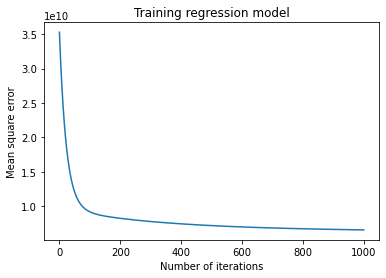

In [12]:
# Plotting mean square error of regression model training
plt.plot(regressor.mse)
plt.title('Training regression model')
plt.xlabel('Number of iterations')
plt.ylabel('Mean square error')
plt.show()

### Evaluating our model

In [13]:
y_pred = regressor.predict(X_test)

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.679283730968065

### VIsualizing flats's size and predicted price

In [15]:
import seaborn as sns

In [16]:
test_dataset = pd.DataFrame()
test_dataset['area_property'] = X_test[:, 1]
test_dataset['price'] = y_test
test_dataset

,area_property,price
0,0.357462,215000.0
1,0.690051,89900.0
2,0.218884,249000.0
3,-0.279999,175000.0
4,1.10579,265000.0
...,...,...
744,0.440609,99000.0
745,-0.085989,75000.0
746,0.191168,204000.0
747,-0.224568,68500.0


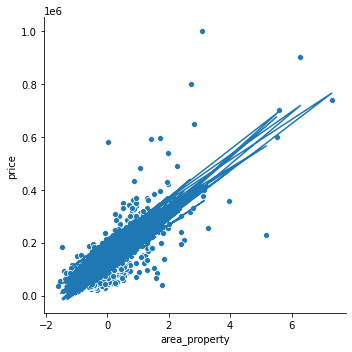

In [17]:
sns.relplot(x='area_property', 
            y='price',
            data=test_dataset);
plt.plot(X_test[:, 1], y_pred)

## Saving the model and the column transformers (onehotencoder and scaler)

#### Exporting model's coefficients

In [19]:
regressor.w

array([-1.16703882e+04,  9.13108715e+04, -7.44090297e+02, -7.23874710e+03,
       -2.59249124e+03, -8.84106759e+02, -9.80009594e+02, -2.51456085e+03,
       -3.83717942e+02, -5.39868534e+03, -1.53675613e+04,  6.87219982e+04,
        2.96886894e+04,  8.44595281e+00, -3.59442191e+03,  2.98012308e+04,
       -4.60972886e+03,  9.15260131e+01,  4.45091058e+04,  1.97341740e+04,
        4.89104259e+03, -1.06075290e+03,  3.10043404e+03,  5.23769946e+03,
        6.83022444e+03,  7.61841858e+02,  1.24277382e+04,  8.40037692e+04])

In [20]:
# Saving coefficients to file
with open("model/weights.txt", 'w') as output:
    for row in regressor.w:
        output.write(str(row) + '\n')

#### Serializing and exporting column transformer - OneHotEncoder

In [21]:
import pickle

In [23]:
# Saving one-hot-encoder - categorical column encoder
with open("model/onehotencoder.pickle", "wb") as output:
    pickle.dump(ct1, output)

#### Serializing and exporting column transformer - StandardScaler

In [24]:
# Saving standardizer - numerical column scaler
with open("model/standardizer.pickle", "wb") as output:
    pickle.dump(ct2, output)